<a href="https://colab.research.google.com/github/shobhitatiwari/Data-science/blob/master/keras_neural_network_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Digit Recognition**

In [1]:
pip install mnist

In [2]:
import keras
import tensorflow
import mnist

In [3]:
#neural network code

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [4]:
train_images=mnist.train_images()
train_labels=mnist.train_labels()
test_images=mnist.test_images()
test_labels=mnist.test_labels()

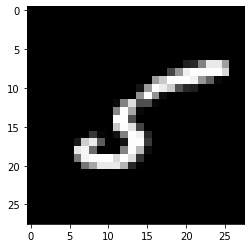

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image=train_images[11]
plt.imshow(first_image, cmap='gray')
plt.show()

In [6]:
print(train_images.shape)
print(test_images.shape)
len(train_images)/len(test_images)  #Ratio of train and test

(60000, 28, 28)
(10000, 28, 28)


6.0

In [7]:
#Normalise the images
train_images=(train_images/255)
test_images=(test_images/255)


In [8]:
#Flatten the images

train_images=train_images.reshape((-1,784))
test_images=test_images.reshape((-1,784))

In [9]:
#Build the model

model=Sequential([
                  Dense(64, activation='relu', input_shape=(784,)),
                  Dense(64, activation='relu'),
                  Dense(10, activation='softmax'),
])

In [10]:
#Compile the model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [11]:
#Train the model

model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=7,
    batch_size=32,
)

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2708 - accuracy: 0.9217
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1222 - accuracy: 0.9627
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0860 - accuracy: 0.9734
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0680 - accuracy: 0.9783
Epoch 5/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0551 - accuracy: 0.9825
Epoch 6/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0471 - accuracy: 0.9848
Epoch 7/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0381 - accuracy: 0.9880


In [12]:
#evaluate model

model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 0s 957us/step - loss: 0.1046 - accuracy: 0.9693


[0.10462353378534317, 0.9692999720573425]

In [14]:
test_images[44].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

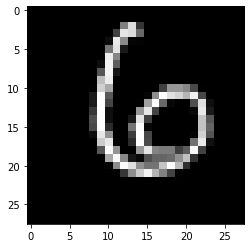

In [20]:
first_image=test_images[100]
plt.imshow(first_image.reshape((28,28)), cmap='gray')

In [21]:
np.argmax(model.predict(test_images[100].reshape((-1,784))))

6

In [23]:
#save the model to disk


model.save_weights('keras_mnist_model.h5')


#load the model from disk later on using
#model.load_weights('model.h5')

#Predict on the first 5 test images
predictions=model.predict(test_images[:5])

#Print model's predictions
print(np.argmax(predictions, axis=1))

#Check predictions again true values
print(test_labels[:5])


[7 2 1 0 4]
[7 2 1 0 4]
